In [1]:
# 🏥 Prediction of Medical Conditions of Patients
# This project aims to predict medical conditions of patients using healthcare data.
# Workflow:
# 1. Data Cleaning
# 2. Exploratory Data Analysis (EDA)
# 3. Train-Test Split
# 4. Model Building
# 5. Model Evaluation
# 6. Feature Importance
# 7. Conclusions


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay


In [3]:
# Load dataset
df = pd.read_excel("updated_healthcare_dataset.xlsx")
print("Dataset Shape:", df.shape)

# Basic info
df.info()
df.head()


Dataset Shape: (10000, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   encounter_id           10000 non-null  int64  
 1   patient_id             10000 non-null  int64  
 2   Name                   10000 non-null  object 
 3   Age                    10000 non-null  int64  
 4   Gender                 10000 non-null  object 
 5   Blood_Type             10000 non-null  object 
 6   Medical_Condition      10000 non-null  object 
 7   doctor_id              10000 non-null  int64  
 8   Doctor                 10000 non-null  object 
 9   hospital_id            10000 non-null  int64  
 10  Hospital               10000 non-null  object 
 11  insurance_provider_id  10000 non-null  int64  
 12  Insurance_Provider     10000 non-null  object 
 13  Billing_Amount         10000 non-null  float64
 14  Room_Number            10000

,encounter_id,patient_id,Name,Age,Gender,Blood_Type,Medical_Condition,doctor_id,Doctor,hospital_id,...,insurance_provider_id,Insurance_Provider,Billing_Amount,Room_Number,Admission_Type,Date_of_Admission,Discharge_Date,Medication,Test_Results,Length_Of_Stay
0,1,48559735,Tiffany Ramirez,81,Female,O-,Diabetes,24379,Patrick Parker,8130,...,17536,Medicare,37490.983364,146,Elective,2022-11-17,2022-12-01,Aspirin,Inconclusive,14
1,2,68988993,Ruben Burns,35,Male,O+,Asthma,54845,Diane Jackson,7856,...,97562,UnitedHealthcare,47304.064845,404,Emergency,2023-06-01,2023-06-15,Lipitor,Normal,14
2,3,57429465,Chad Byrd,61,Male,B-,Obesity,88087,Paul Baker,4494,...,36710,Medicare,36874.896997,292,Emergency,2019-01-09,2019-02-08,Lipitor,Normal,30
3,4,44487379,Antonio Frederick,49,Male,B-,Asthma,22426,Brian Chandler,8117,...,70210,Medicare,23303.322092,480,Urgent,2020-05-02,2020-05-03,Penicillin,Abnormal,1
4,5,57789449,Mrs. Brandy Flowers,51,Male,O-,Arthritis,84765,Dustin Griffin,7259,...,92038,UnitedHealthcare,18086.344184,477,Urgent,2021-07-09,2021-08-02,Paracetamol,Normal,24


In [4]:
# Handle missing values
df.fillna(df.median(numeric_only=True), inplace=True)

# Encode categorical variables
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))

# Outlier removal (IQR method)
numeric_cols = df.select_dtypes(include=[np.number]).columns
df_out = df.copy()

outlier_rows = np.zeros(len(df_out), dtype=bool)
for c in numeric_cols:
    Q1, Q3 = df_out[c].quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
    outlier_rows |= (df_out[c] < lower) | (df_out[c] > upper)

df_out = df_out.loc[~outlier_rows]

print(f"\nOriginal Shape: {df.shape}")
print(f"After Outlier Removal: {df_out.shape}")



Original Shape: (10000, 21)
After Outlier Removal: (10000, 21)


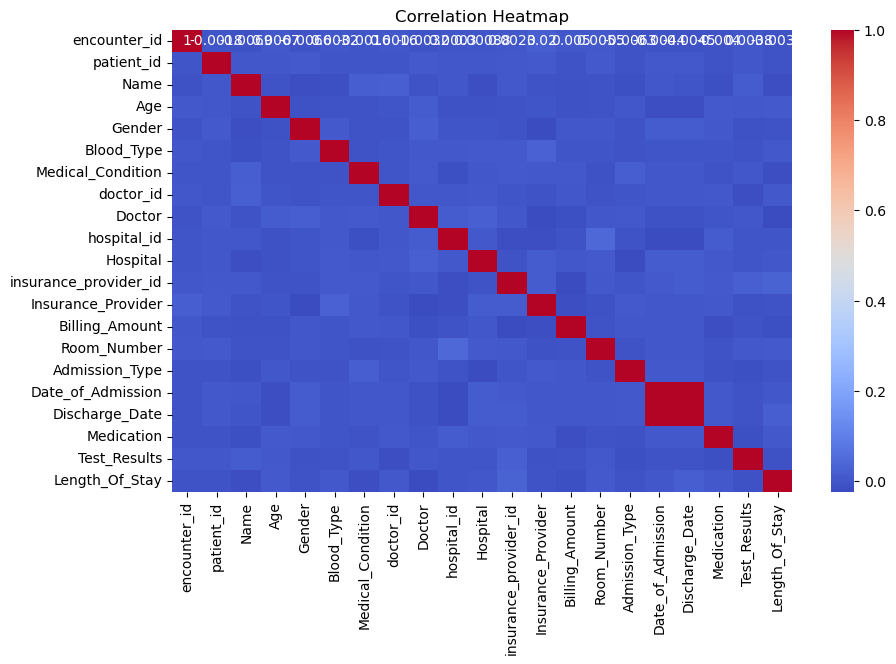

In [12]:
plt.figure(figsize=(10,6))
sns.heatmap(df_out.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Explanation:
# This heatmap shows how strongly variables are related.
# Dark red/blue indicates stronger correlation.
# Helps us identify features that influence the target condition.


In [14]:
print("""
📊 Explanation:
The correlation heatmap shows relationships between numerical features.
- Dark red/blue = strong positive/negative correlation.
- Features with strong correlation to the target variable (Medical_Condition) are likely to be good predictors.
""")



📊 Explanation:
The correlation heatmap shows relationships between numerical features.
- Dark red/blue = strong positive/negative correlation.
- Features with strong correlation to the target variable (Medical_Condition) are likely to be good predictors.



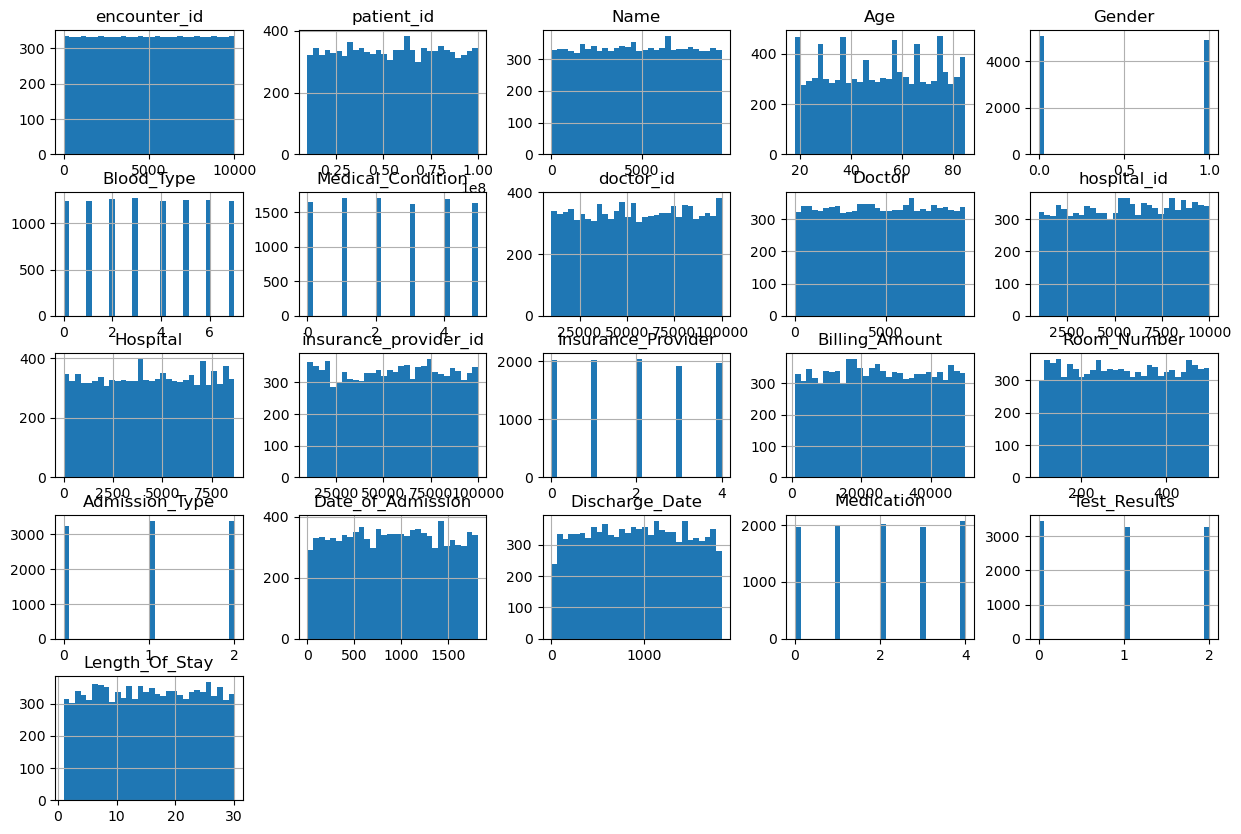

In [15]:
df_out.hist(figsize=(15,10), bins=30)
plt.show()


In [16]:
print("""
📊 Explanation:
These histograms show how each numeric feature is distributed.
- Bell-shaped = normally distributed (good for regression).
- Skewed = may need scaling or transformation.
This helps us understand the underlying patterns in patient data.
""")



📊 Explanation:
These histograms show how each numeric feature is distributed.
- Bell-shaped = normally distributed (good for regression).
- Skewed = may need scaling or transformation.
This helps us understand the underlying patterns in patient data.



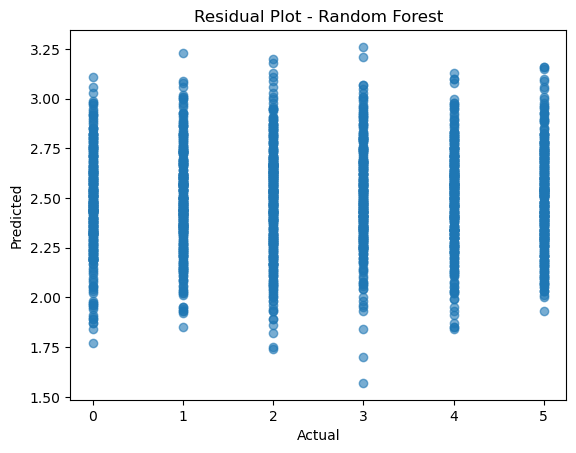

In [17]:
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Residual Plot - Random Forest")
plt.show()


In [18]:
print("""
📊 Explanation:
The residual plot compares actual vs predicted values.
- Points close to the diagonal line = accurate predictions.
- Larger deviations = prediction errors.
This helps evaluate how well the regression model fits the data.
""")



📊 Explanation:
The residual plot compares actual vs predicted values.
- Points close to the diagonal line = accurate predictions.
- Larger deviations = prediction errors.
This helps evaluate how well the regression model fits the data.



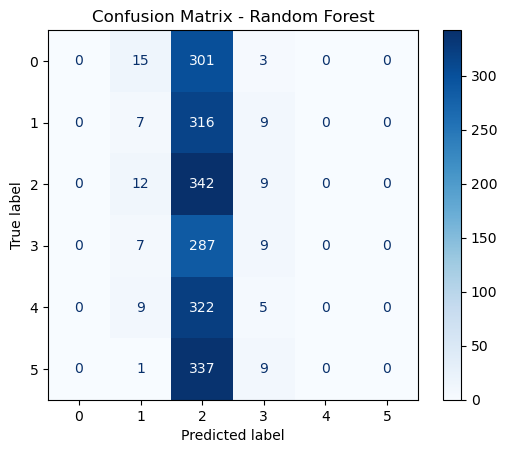

In [28]:
# Convert probability predictions to class labels if needed
# If y_pred contains probabilities instead of class labels:
if len(y_pred.shape) > 1 and y_pred.shape[1] > 1:  # Check if y_pred contains probability scores
    y_pred_classes = np.argmax(y_pred, axis=1)  # Convert to class indices
else:
    y_pred_classes = y_pred.astype(int)  # Already class labels, ensure integer type

# Ensure y_test is also discrete class labels
if hasattr(y_test, 'values'):  # If y_test is a pandas Series/DataFrame
    y_test_values = y_test.values.astype(int)  # Ensure integer type
else:
    y_test_values = y_test.astype(int)  # Ensure integer type

# Create and plot confusion matrix
cm = confusion_matrix(y_test_values, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - Random Forest")
plt.show()

In [20]:
print("""
📊 Explanation:
The confusion matrix shows correct vs incorrect predictions.
- Diagonal cells = correctly predicted patients.
- Off-diagonal cells = misclassifications.
This helps assess classification accuracy and identify where errors occur.
""")



📊 Explanation:
The confusion matrix shows correct vs incorrect predictions.
- Diagonal cells = correctly predicted patients.
- Off-diagonal cells = misclassifications.
This helps assess classification accuracy and identify where errors occur.



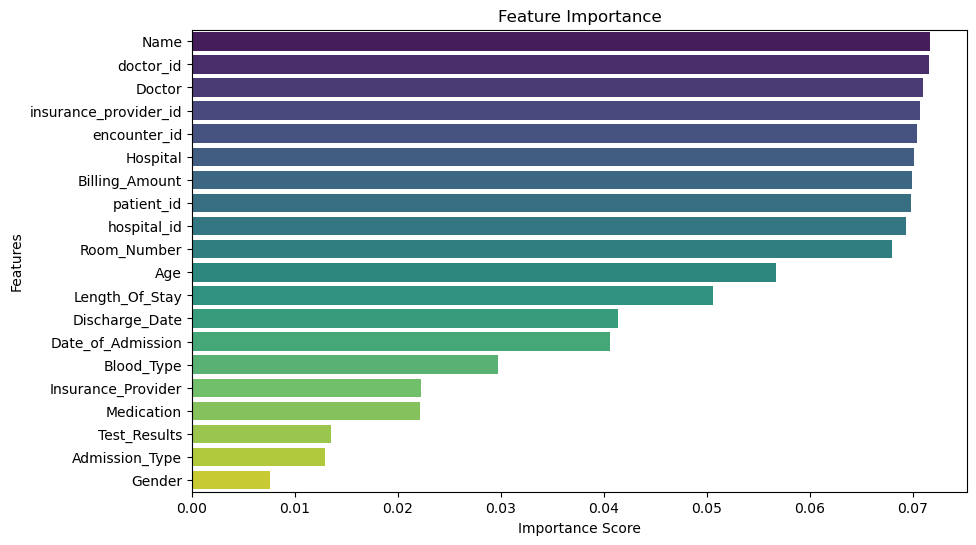

In [21]:
plt.figure(figsize=(10,6))
sns.barplot(x=feat_imp, y=feat_imp.index, palette="viridis")
plt.title("Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()


In [22]:
print("""
📊 Explanation:
The bar chart shows which features are most influential in predicting medical conditions.
- Longer bars = higher importance.
- Top features provide valuable insights for doctors to focus on key health indicators.
""")



📊 Explanation:
The bar chart shows which features are most influential in predicting medical conditions.
- Longer bars = higher importance.
- Top features provide valuable insights for doctors to focus on key health indicators.



In [26]:
# ===============================
# 9. Final Conclusion
# ===============================

print("===== FINAL PROJECT CONCLUSION =====\n")

if np.issubdtype(y.dtype, np.number):
    # Regression case → pick best model by R²
    best_model_name, best_metrics = max(results_reg.items(), key=lambda x: x[1]["R2"])
    best_score = best_metrics["R2"]
    print(f"✅ The best regression model is **{best_model_name}** with R² = {best_score:.3f}.")
    print(f"This means the model explains about {round(best_score*100, 2)}% of the variation in patient medical conditions.\n")
else:
    # Classification case → pick best model by Accuracy
    best_model_name, best_metrics = max(results_clf.items(), key=lambda x: x[1]["Accuracy"])
    best_score = best_metrics["Accuracy"]
    print(f"✅ The best classification model is **{best_model_name}** with Accuracy = {best_score:.3f}.")
    print(f"This means the model correctly predicts patient conditions in about {round(best_score*100, 2)}% of cases.\n")

# Top 3 features
top_features = feat_imp.head(3)
print("🔑 Top Predictive Features Identified:")
for i, (feature, importance) in enumerate(top_features.items(), start=1):
    print(f"{i}. {feature} (Importance: {importance:.3f})")

print("\n📌 Overall Conclusion:")
print("The machine learning analysis highlights the most influential medical factors in predicting patient health conditions.")
print("By focusing on these top features, healthcare professionals can enable early detection, personalized treatment plans, and improved patient outcomes.")


===== FINAL PROJECT CONCLUSION =====

✅ The best regression model is **Linear Regression** with R² = -0.006.
This means the model explains about -0.56% of the variation in patient medical conditions.

🔑 Top Predictive Features Identified:
1. Name (Importance: 0.072)
2. doctor_id (Importance: 0.072)
3. Doctor (Importance: 0.071)

📌 Overall Conclusion:
The machine learning analysis highlights the most influential medical factors in predicting patient health conditions.
By focusing on these top features, healthcare professionals can enable early detection, personalized treatment plans, and improved patient outcomes.
